In [1]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(sys.path[0]).parent / "libs"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import qutip

In [3]:
%reload_ext autoreload
%autoreload 2

import bec
import entanglement_propagation
from tools.jupyter import print_model_info

In [15]:
n_bosons = 7
m_sites = 5
k_measured = (0,) * (m_sites // 2)
i_projection = 0

In [16]:
tspan = np.linspace(0, 1, 3)
states = [
    entanglement_propagation.f_state(t, i_projection, k_measured, m_sites, n_bosons)
    for t in tspan
]

Нормировка

In [17]:
print(*(((s.dag() * s).full()[0, 0]).real for s in states))

0.0 0.000595606923338365 0.0031975053093563125


In [18]:
@np.vectorize
def entropy_vn(t):
    s = entanglement_propagation.f_state(t, i_projection, k_measured, m_sites, n_bosons)
    return qutip.entropy.entropy_vn(qutip.ptrace(s, [0, 1]))

In [12]:
%%time

tspan = np.linspace(0, 1.5, 150)
entropy_vn_span = entropy_vn(tspan)

CPU times: user 2min 41s, sys: 48.5 s, total: 3min 30s
Wall time: 27.4 s


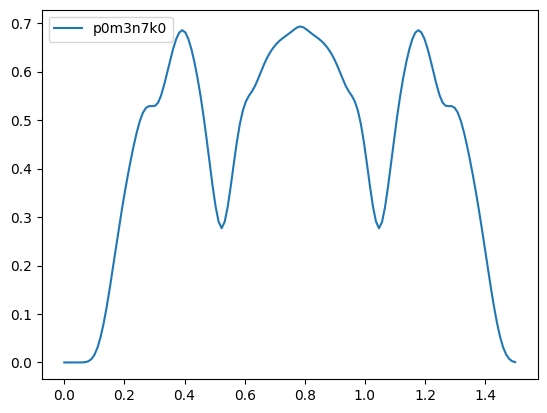

In [14]:
plt.plot(
    tspan,
    entropy_vn_span,
    label=f"p{i_projection}m{m_sites}n{n_bosons}k{''.join(map(str, k_measured))}",
)
plt.legend()